In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
%matplotlib inline

# messing around to show that this particulary fuzzy cmeans cannot deal with uneven sized clusters
# just added the data_points property to give different sized groups
# cmeans fails dramatically

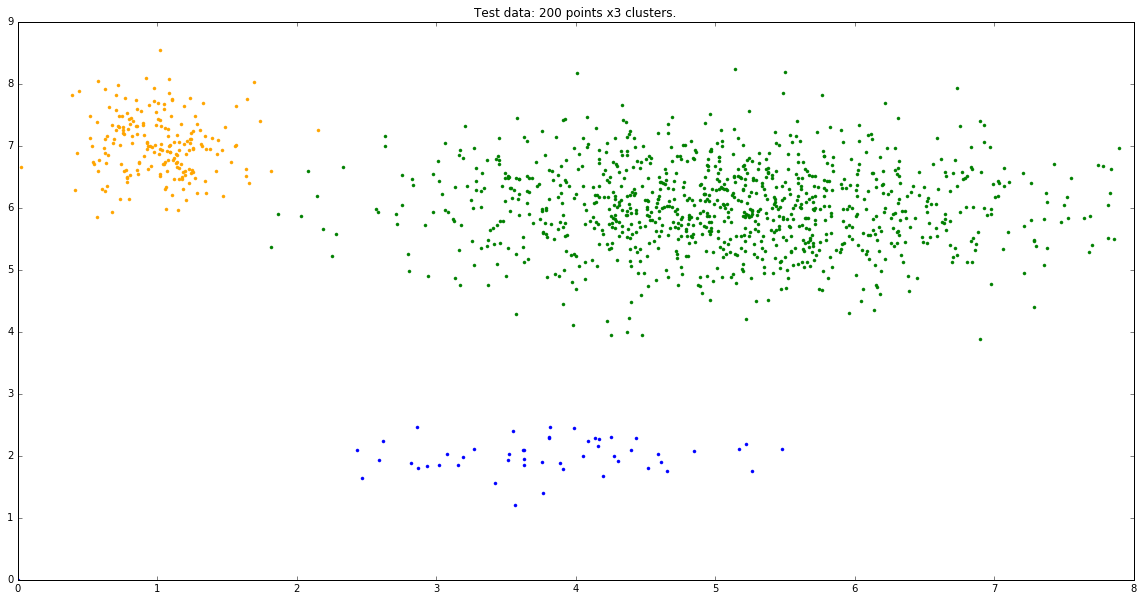

In [5]:
colors = ['b','orange','g','r','c','m','y','k','Brown','ForestGreen']

# define cluster 
centers = [[4,2],[1,7],[5,6]]

# cluster sigmas
sigmas = [[0.8,0.3],[0.3,0.5],[1.1,0.7]]

# data point in each set
data_points =[[50],[200],[1000]]

# Generate test data
np.random.seed(42) 
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma), points) in enumerate(zip(centers, sigmas, data_points)):
    xpts = np.hstack((xpts, np.random.standard_normal(points) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(points) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(points) * i))
    
# Visualize the test data
fig0, ax0 = plt.subplots(figsize=(20,10))
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
        color=colors[label])
    
ax0.set_title('Test data: 200 points x3 clusters.')

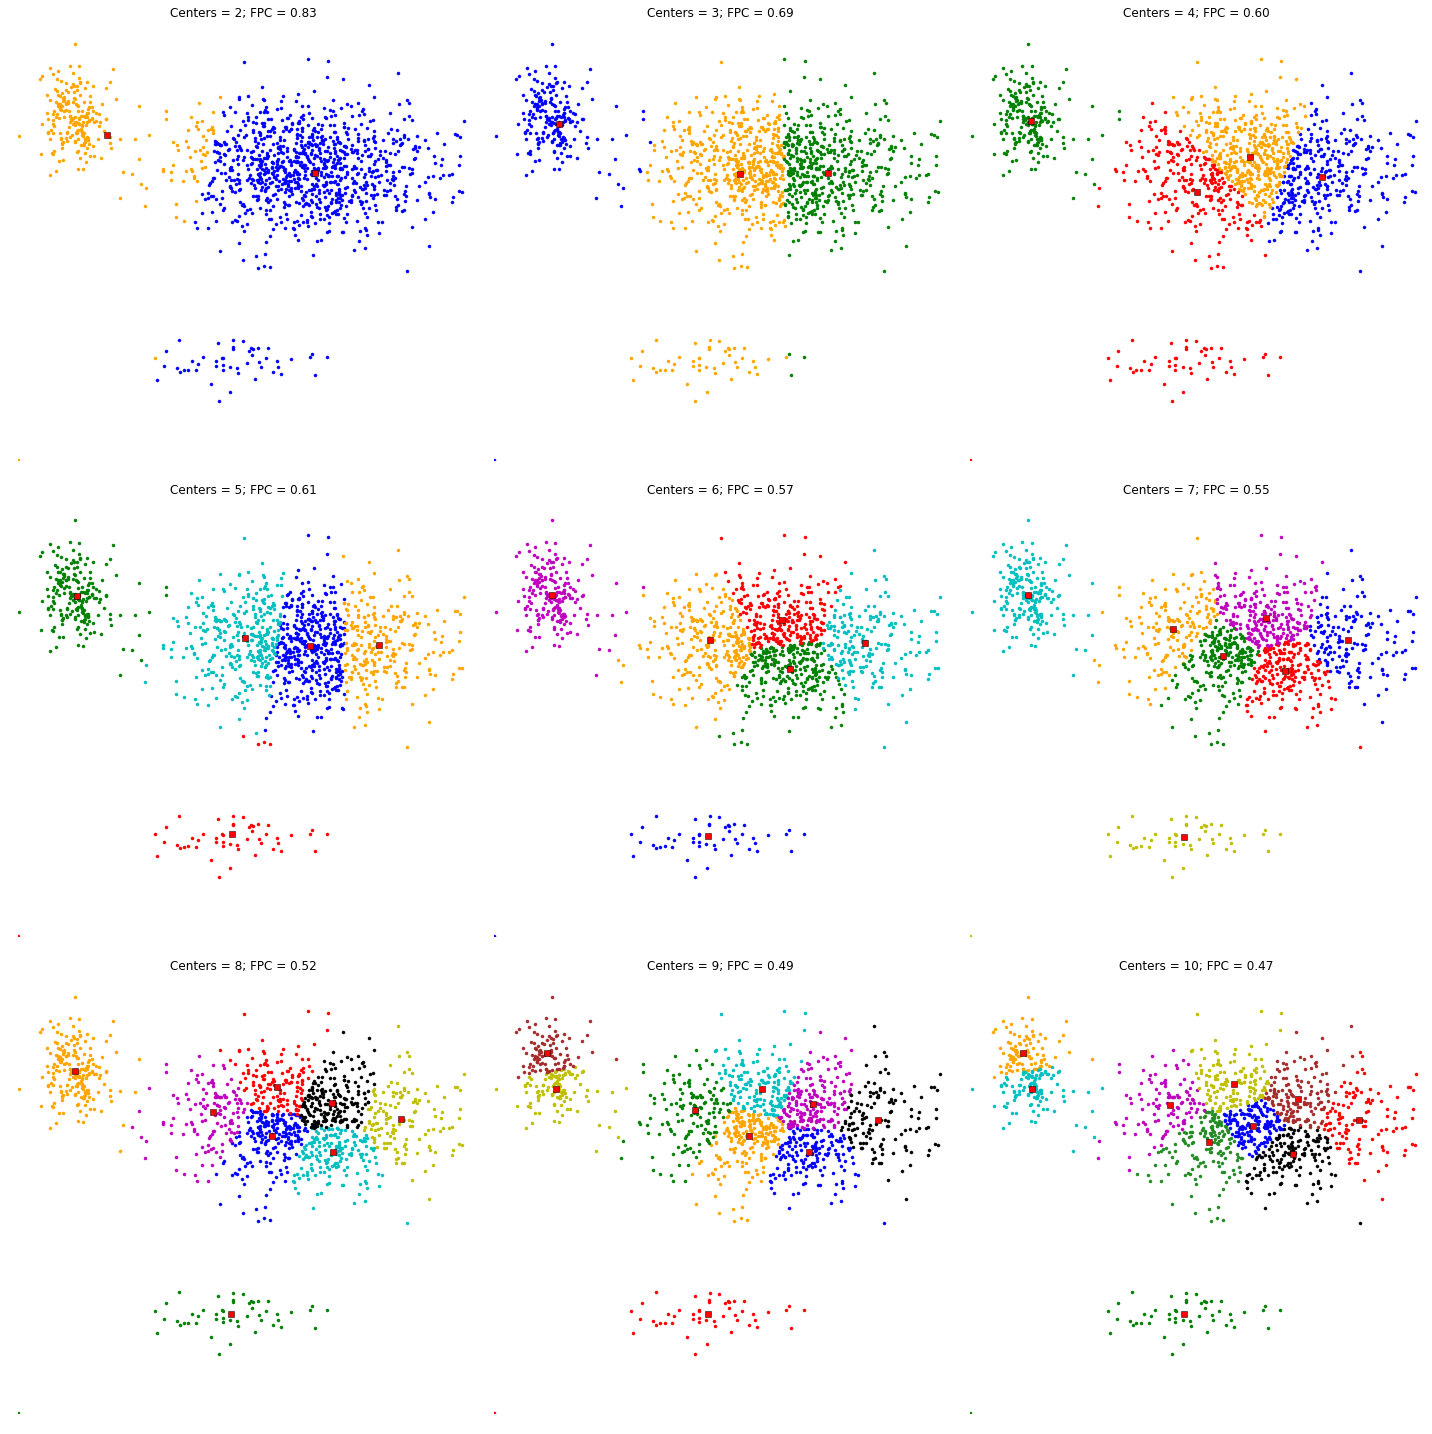

In [6]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(20, 20))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
    
fig1.tight_layout()

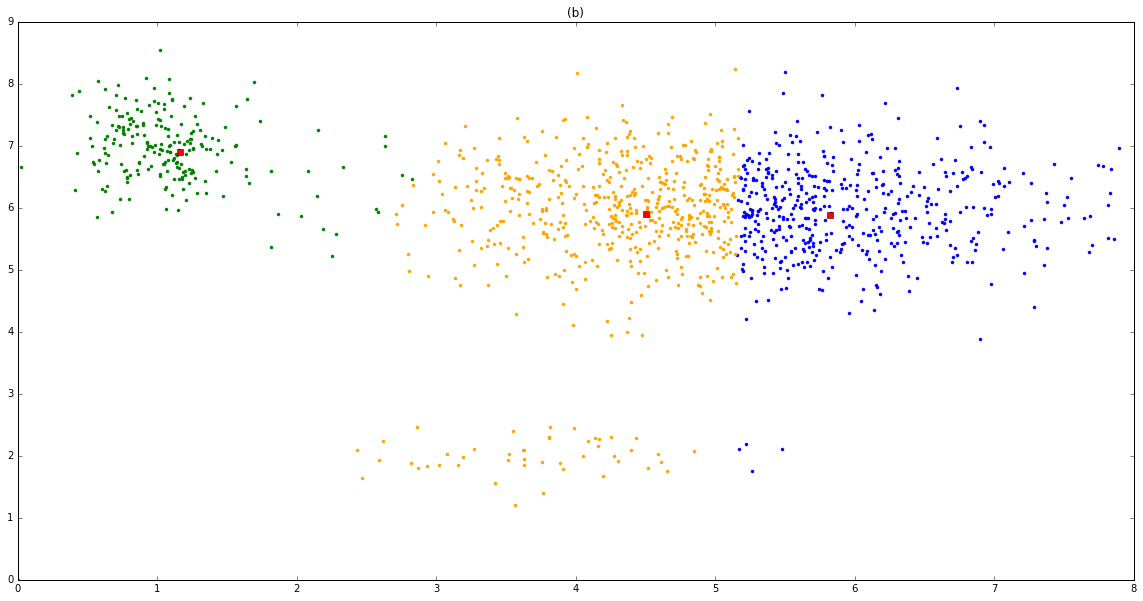

In [18]:
# Set up the loop and plot
plt.figure(figsize=(20,10))
alldata = np.vstack((xpts, ypts))

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, 3, 3, error=0.005, maxiter=1000, init=None)

# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
for j in range(0,3):
    plt.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
ax.axis('off')
plt.title('(b)')
    
fig1.tight_layout()

In [15]:
xpts[cluster_membership == 0]

array([ 5.21842389,  5.26337025,  5.17251902,  5.48182255,  6.0187953 ,
        7.1003583 ,  5.61926616,  5.29750251,  5.83093035,  5.55100891,
        5.82652584,  5.59769621,  5.62765854,  5.28569475,  5.7024517 ,
        6.10692209,  5.91926132,  5.5827846 ,  6.58572548,  5.63477934,
        5.40826046,  6.28456027,  5.27986293,  5.37136293,  5.43389736,
        5.31875234,  7.28294088,  5.95823717,  6.32133531,  6.84408104,
        5.35962011,  5.91234614,  5.25917601,  5.84795171,  6.25812945,
        5.37234605,  5.69606005,  7.49776214,  5.20005288,  5.27304264,
        5.9133694 ,  5.52687781,  5.36702832,  6.14129394,  5.41503054,
        5.83268748,  5.95656651,  6.49120164,  5.45477839,  7.06447539,
        6.64564874,  5.71980222,  5.30796549,  7.69032718,  5.79834329,
        5.52911015,  5.24627243,  5.51861519,  7.07022695,  6.47996205,
        6.75250529,  6.20361067,  6.68250535,  5.90548764,  6.83592368,
        5.765827  ,  7.0338517 ,  6.23922153,  7.83069578,  5.21

In [6]:
u.shape

(10, 1251)